In [1]:
#### Interferometry Analysis Software for Ofenrohr-Interferomter at Astropeiler
# Version 1.0

# import packages
import time
import os

# import python scripts
import times
import single_stovepipe
import correlation
import fringe_period
import uv_cov
import visibility_calc
import imaging

In [2]:
# start time to measure duration of programm execution
start_time = time.time()

In [3]:
# define basic parameters: 

# resampling to smooth data/ compensate integration time rate
resampling = 5
# Cantenna-Scan to analyze
scan_number = '321g'
filename_data = './Data/LCORR_'+str(scan_number)+'.csv'
# save results of analysis in this folder
#os.mkdir('./Analysis/LCORR_'+str(scan_number))

In [4]:
# get time vector in fractional hours from Scan
time_h = times.time_h(scan_number)
# resample fractionaal time vector
time_h_res = times.time_h_res(time_h,resampling)
# get sunrise, suntransit, sunset and filter fractional time vector to sun above horizon
time_sun = times.time_sun(scan_number,time_h_res)
# get astronomical twilight times
twil_sun =times.twilight(scan_number,time_h_res)
# define wavelength for observed frequency and bandwidth
wavel = single_stovepipe.wavel(1419e6,2e6,scan_number)

Observation date: 2024/10/21 00:00:00
sunrise at Stockert Observatory will be [UTC]:  2024/10/21 06:05:56
transit at Stockert Observatory will be [UTC]:  2024/10/21 11:17:39
sunset at Stockert Observatory will be [UTC]:  2024/10/21 16:28:34
Twilight morning at Stockert Observatory will be [UTC]:  2024/10/21 04:16:54
Twilight evening at Stockert Observatory will be [UTC]:  2024/10/21 18:17:23
Observed wavelength of central frequency: 0.21127023114869625 m
Observed wavelength of lower end of bandwidth: 0.2114192228490832 m
Observed wavelength of upper end of baseline bandwidth: 0.21112144929577464 m


Results of baseline fit for West antenna:
residuals: 1.3359451860786702
Parameter 1/a: (0.004441223682119396, 4.209395927843244e-05)
Parameter 2/b: (-0.11886532932353364, 0.001407664620192284)
Parameter 3/c: (0.34719151337833515, 0.013612807392341952)
Parameter 4/d: (563.9441287021664, 0.02937151291835702)
Results of baseline fit for East antenna:
residuals: 0.5720123653395316
Parameter 1/a: (-0.0005726144670147042, 2.1023725265822945e-05)
Parameter 2/b: (0.01915025922898308, 0.0008064321795428559)
Parameter 3/c: (-0.27966863816411647, 0.00888291915897307)
Parameter 4/d: (370.88650633085547, 0.02052733367282688)
Results of baseline fit for Middle1 antenna:
residuals: 1.1619251346205908
Parameter 1/a: (-0.0019890373084920443, 4.3250539260475e-05)
Parameter 2/b: (0.10982021017027296, 0.0017782422335422062)
Parameter 3/c: (-1.6286770258380718, 0.020919653482762923)
Parameter 4/d: (360.8768473317364, 0.05252590969304716)
Results of baseline fit for Middle2 antenna:
residuals: 1.33104773584

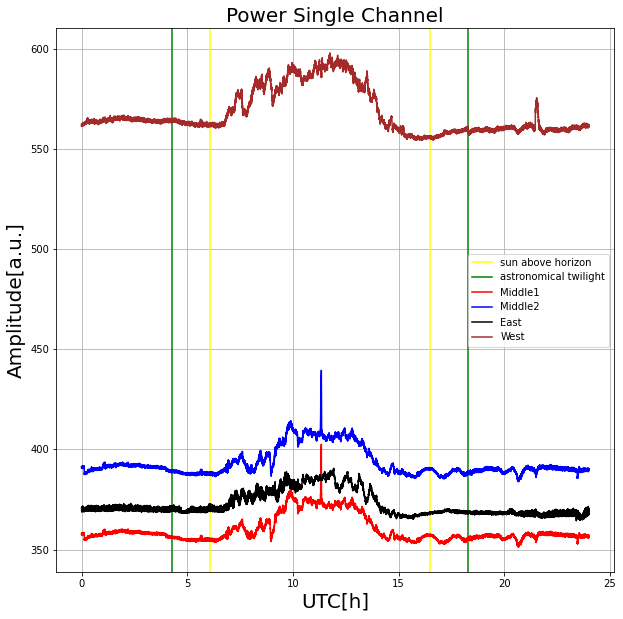

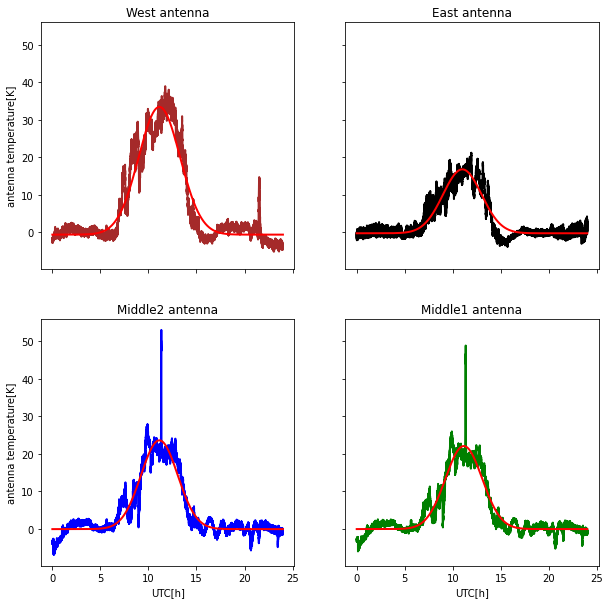

In [5]:
# define continuum signal of each cantenna to check for solar flares/thunderstorms/RFI (layer of water/snow on lid complicates signals)
single_antenna =  single_stovepipe.single_antenna(scan_number,resampling,time_h_res, time_sun[1],time_sun[3],twil_sun[1],twil_sun[2])
# Baseline fit (3rd order polynomial) and RMS of baseline
RMS_analysis = single_stovepipe.RMS_anal(single_antenna, time_h_res, time_sun,scan_number)
# Gaussian fit to sun transit of each Cantenna to deduce Opening Angle (later used for PSF)
HPBW =single_stovepipe.HPBW(RMS_analysis, time_h_res,scan_number)

Results of baseline fit for WM real correlation:
residuals: 0.08360670313847121
Parameter 1/a: (-0.0011919333069913543, 7.930145138561448e-06)
Parameter 2/b: (0.03836139350977377, 0.00030175513308524504)
Parameter 3/c: (-0.24568156922242787, 0.0033020330734388195)
Parameter 4/d: (-1.3341877995976943, 0.007625241574616379)
Results of baseline fit for WM imag correlation:
residuals: 0.10274616475469933
Parameter 1/a: (0.0005007200804889784, 8.636099639403509e-06)
Parameter 2/b: (-0.01532340649879926, 0.0003309426134228231)
Parameter 3/c: (0.09550267233012895, 0.0036399368658458233)
Parameter 4/d: (1.1610728173846756, 0.00838274549403444)
RMS of MW real correlation Measurement: 0.29538115911282503
RMS of MW imag correlation Measurement: 0.32233884854894673
Results of baseline fit for EM real correlation:
residuals: 0.043401861416781026
Parameter 1/a: (8.59140241187248e-05, 5.582871589411124e-06)
Parameter 2/b: (-0.003390975804330169, 0.00021429861122769275)
Parameter 3/c: (0.0051597778942

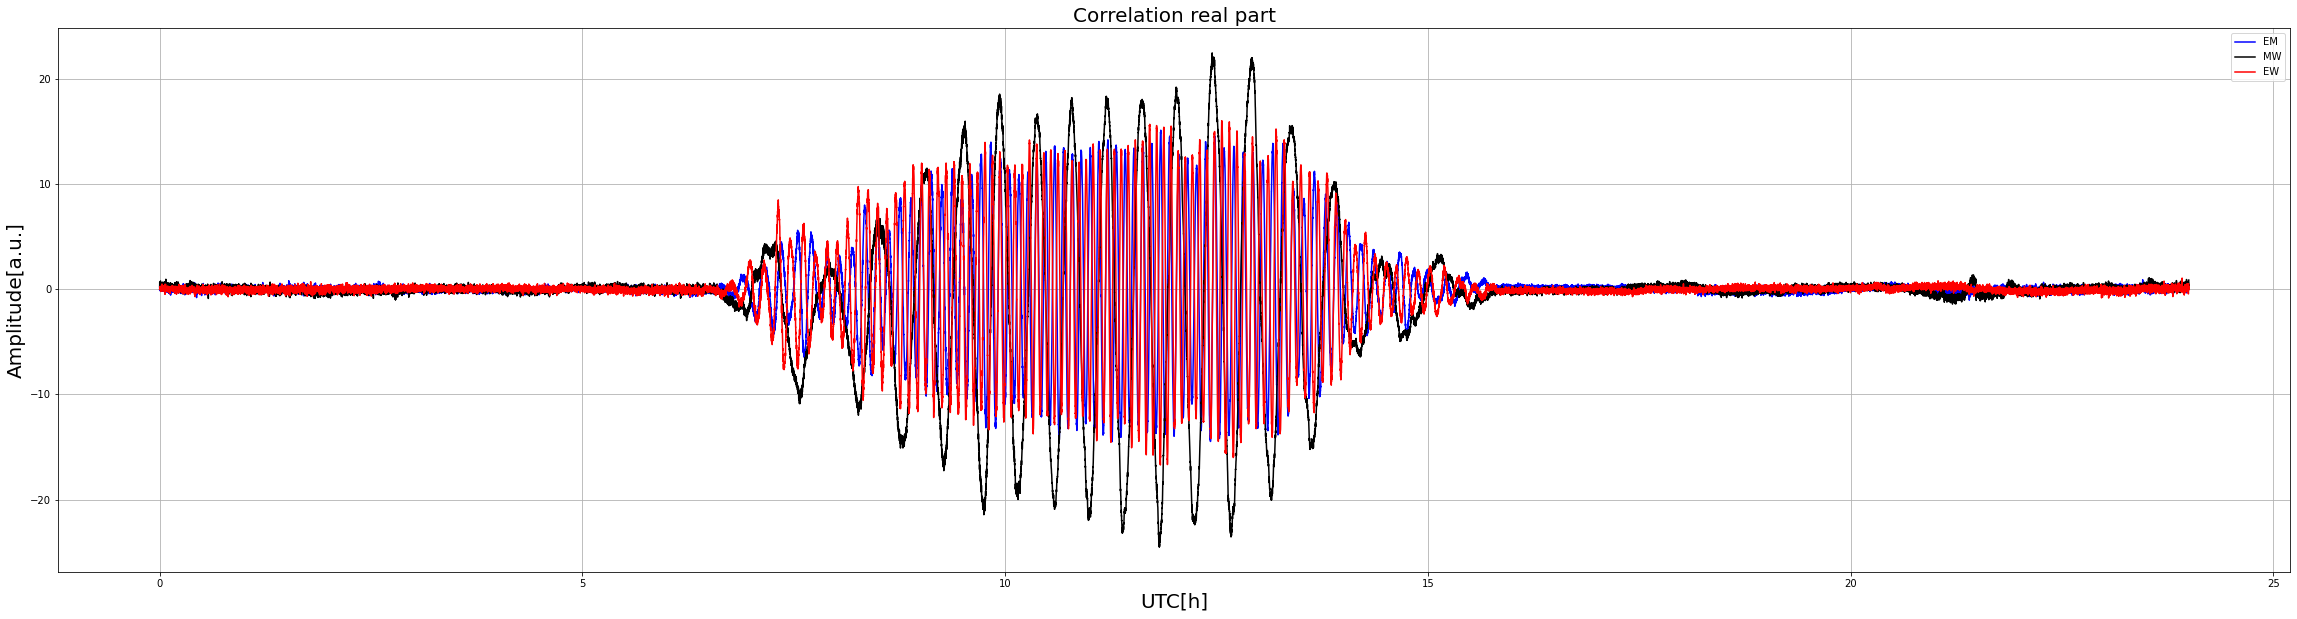

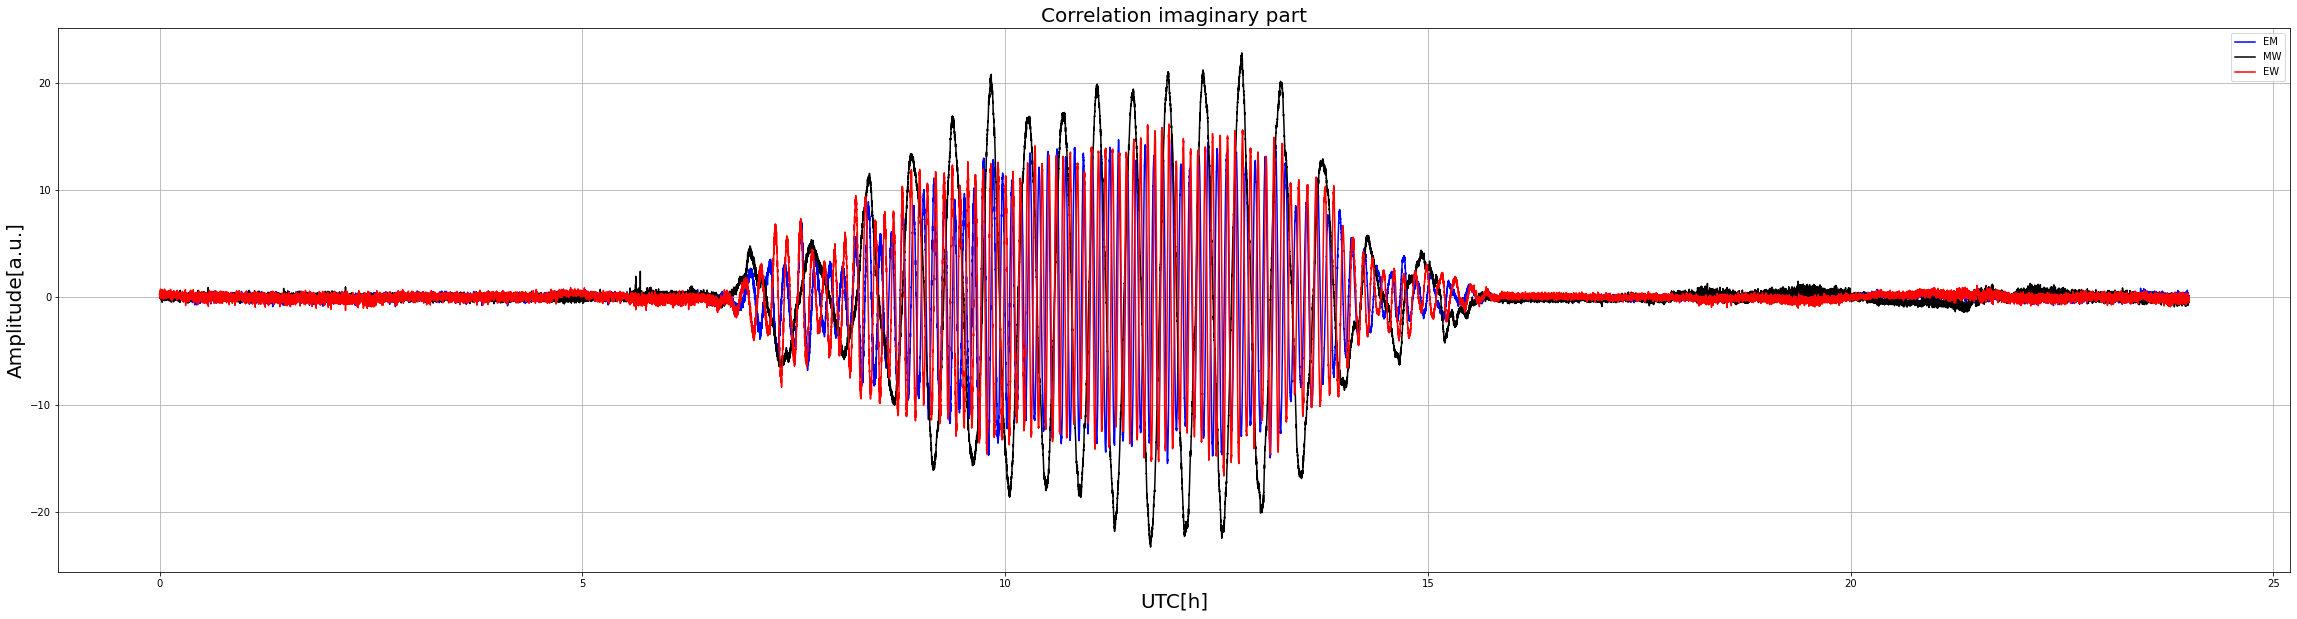

In [6]:
# define and plot real and imaginary parts of correlation of each baseline
correlation_mw =  correlation.correlation_mw(scan_number,time_h_res, time_sun,resampling)
correlation_em =  correlation.correlation_em(scan_number,time_h_res, time_sun,resampling)
correlation_ew =  correlation.correlation_ew(scan_number,time_h_res, time_sun,resampling)
plot_correlation = correlation.plot_correlation(correlation_em,correlation_mw,correlation_ew,scan_number,time_h_res)

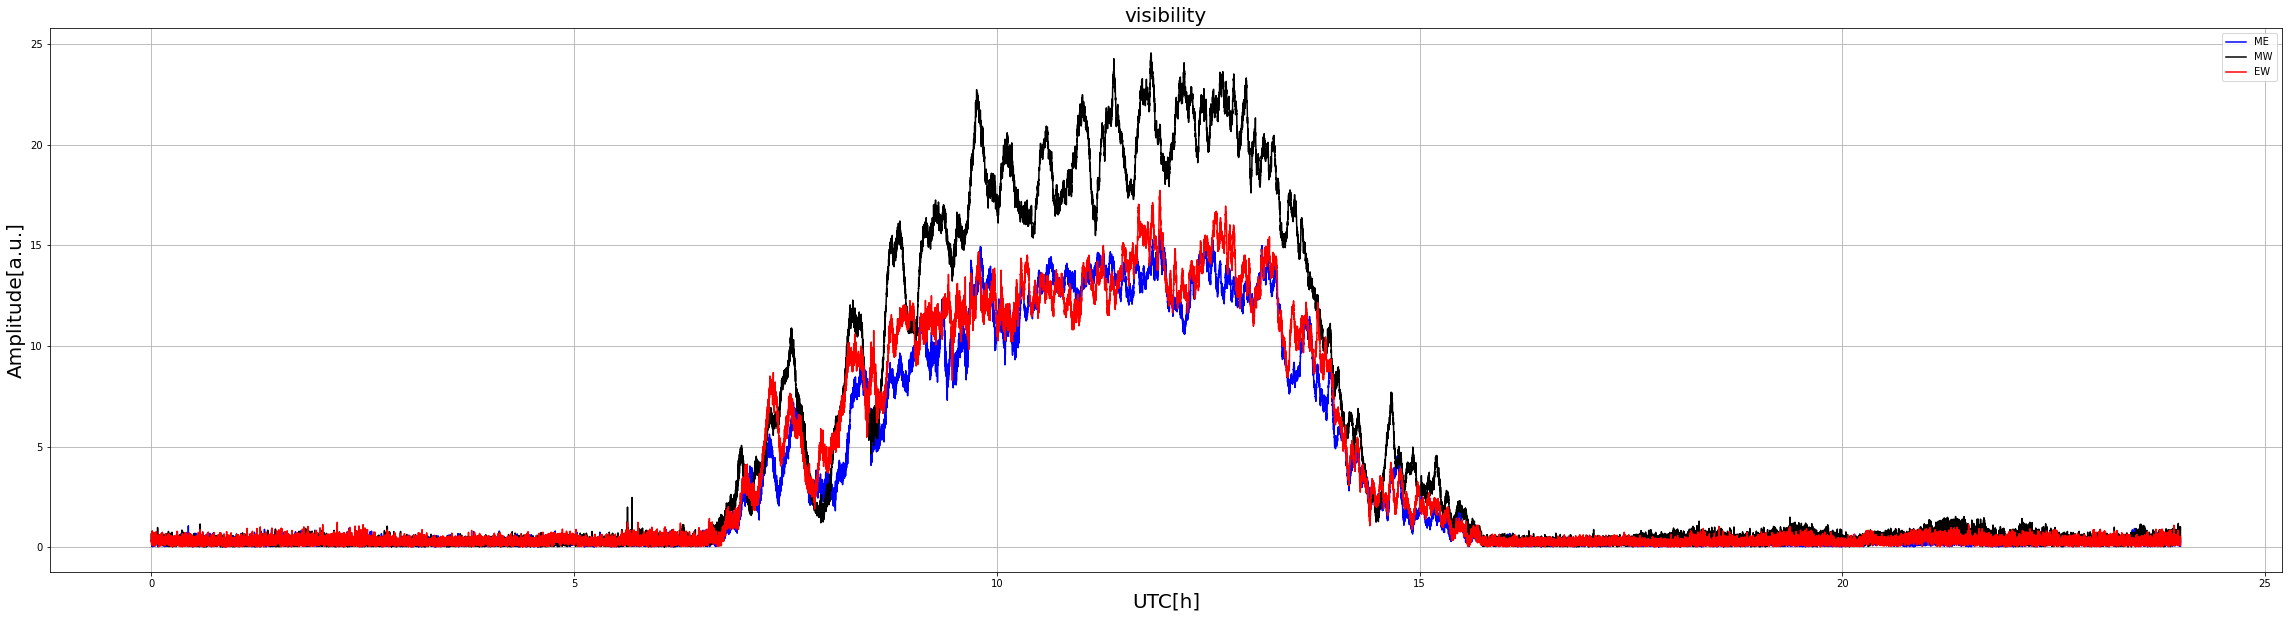

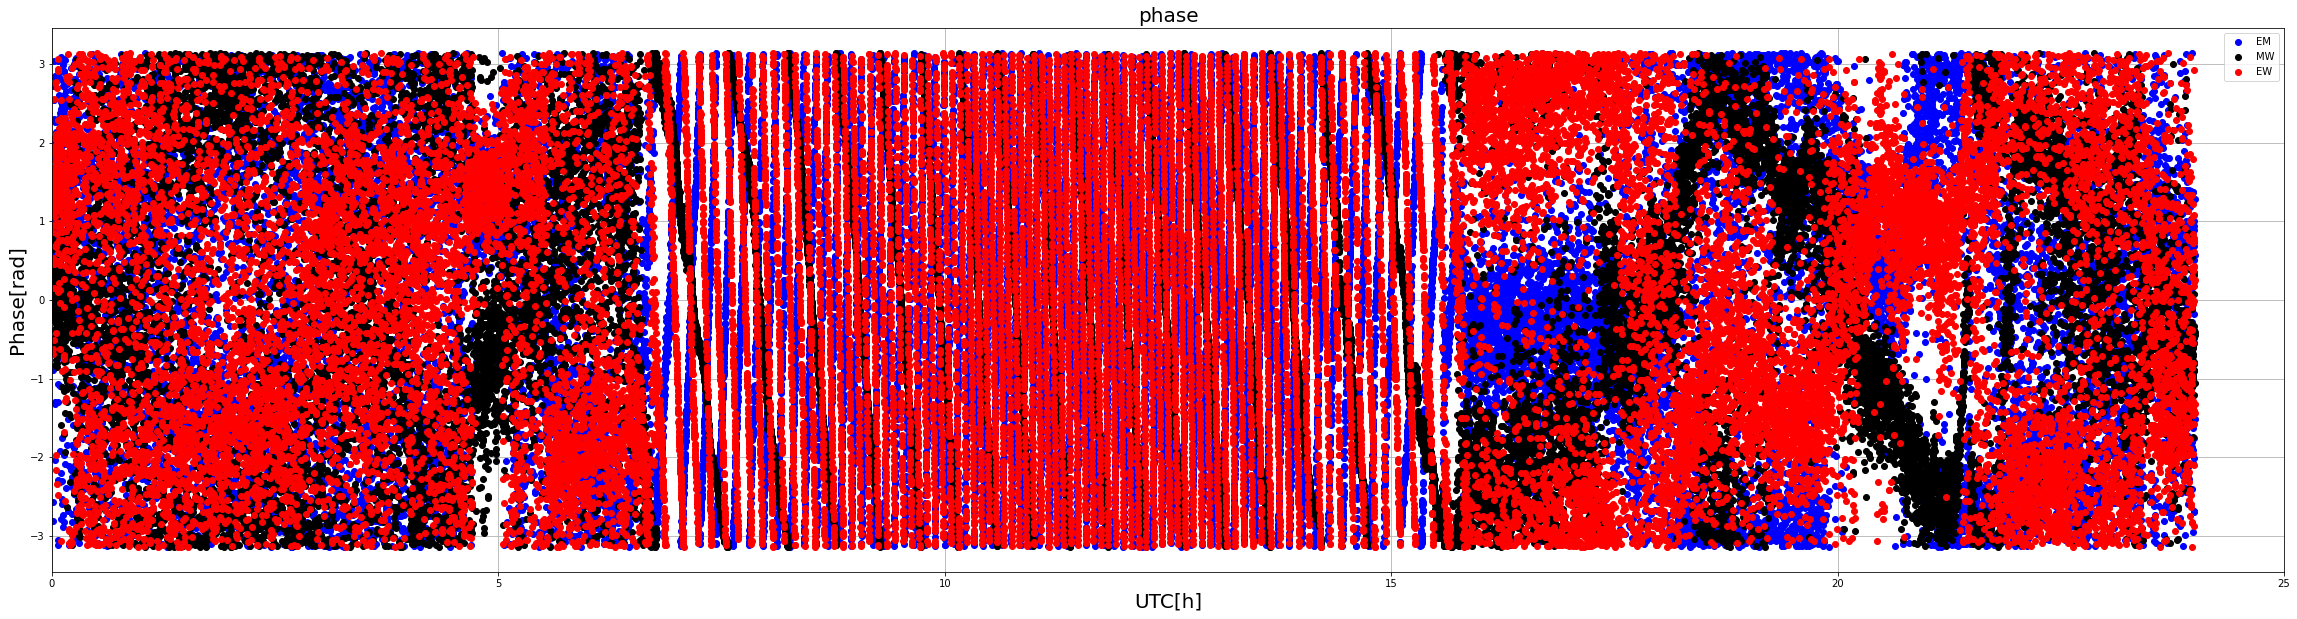

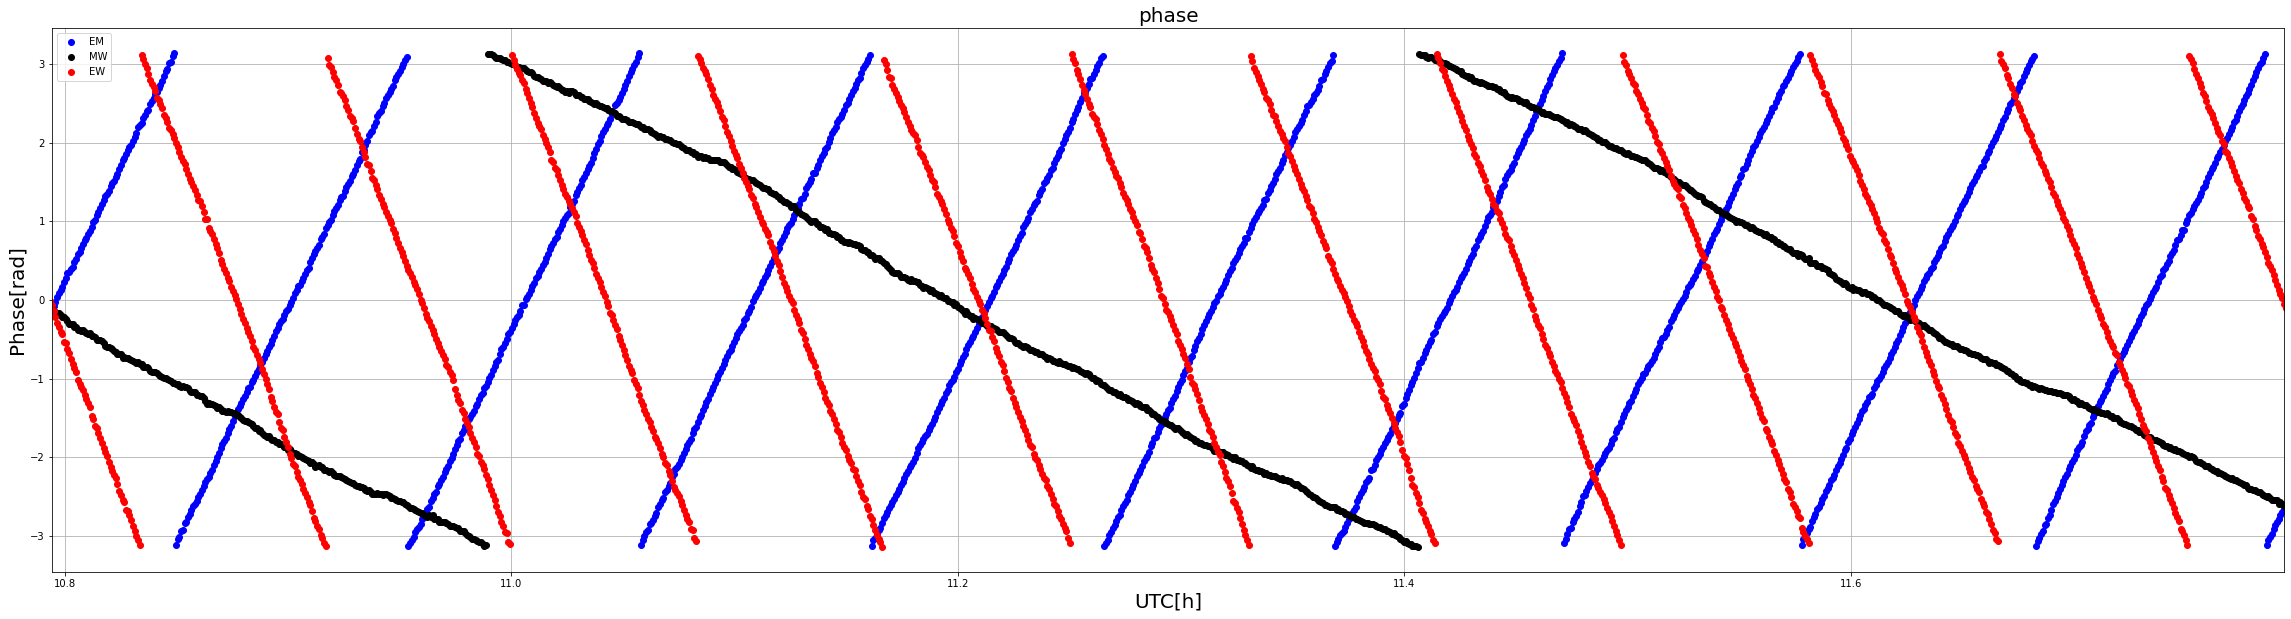

In [7]:
# calculate and plot visibility amplitude and phase 
visibility_em = visibility_calc.visibility_em(correlation_em)
visibility_mw = visibility_calc.visibility_mw(correlation_mw)
visibility_ew = visibility_calc.visibility_ew(correlation_ew)
plot_visibility = visibility_calc.plot_visibility(visibility_em,visibility_mw,visibility_ew,time_h_res,time_sun[2],scan_number)

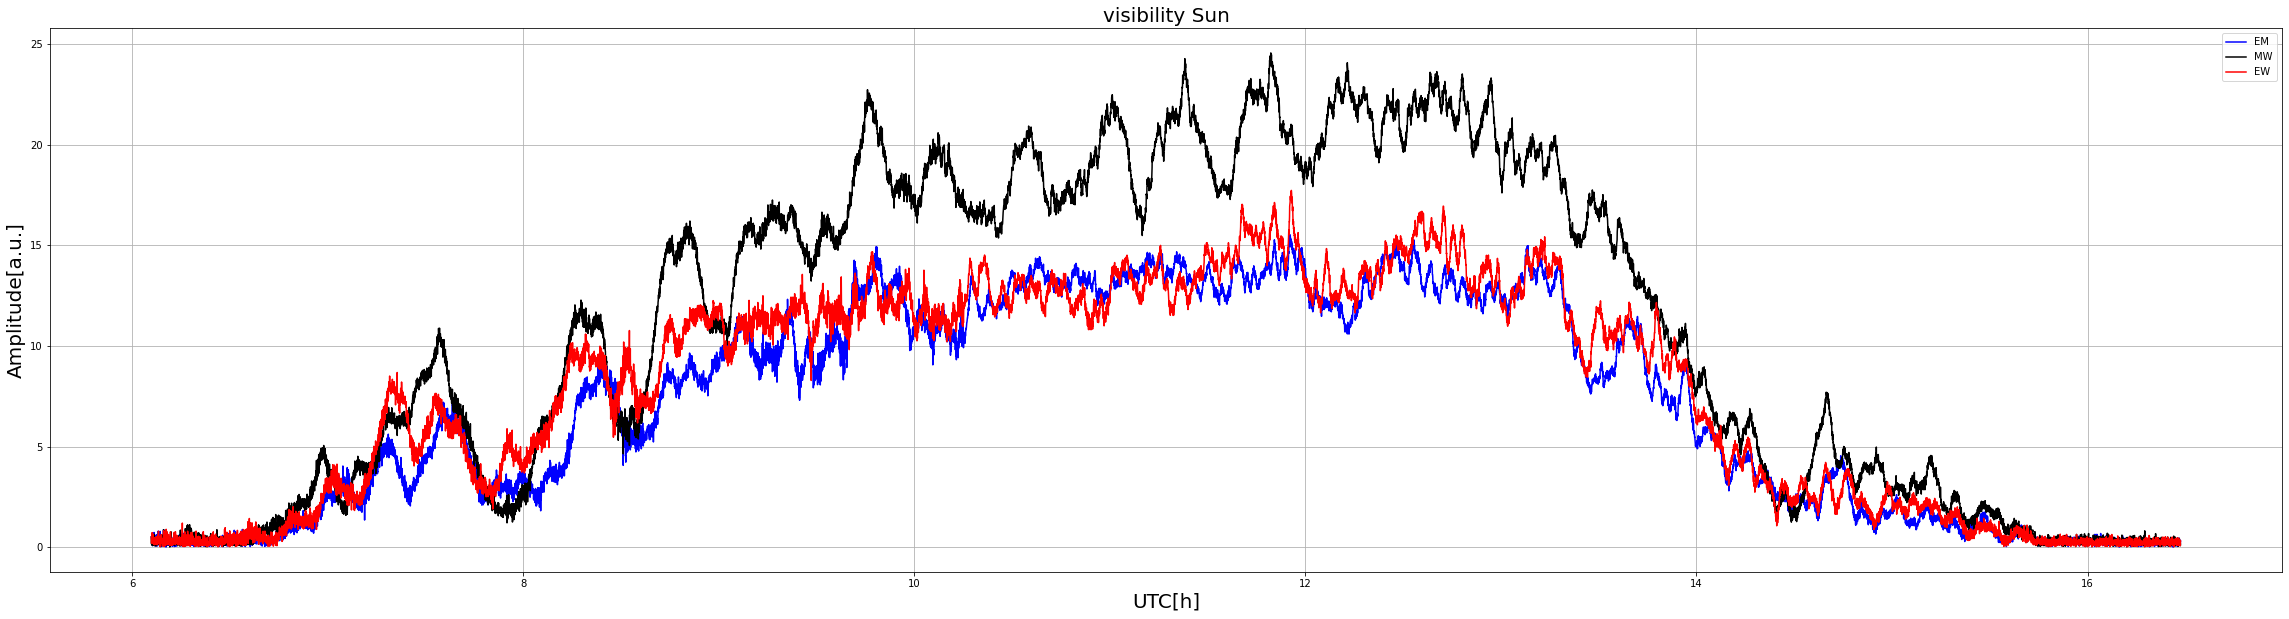

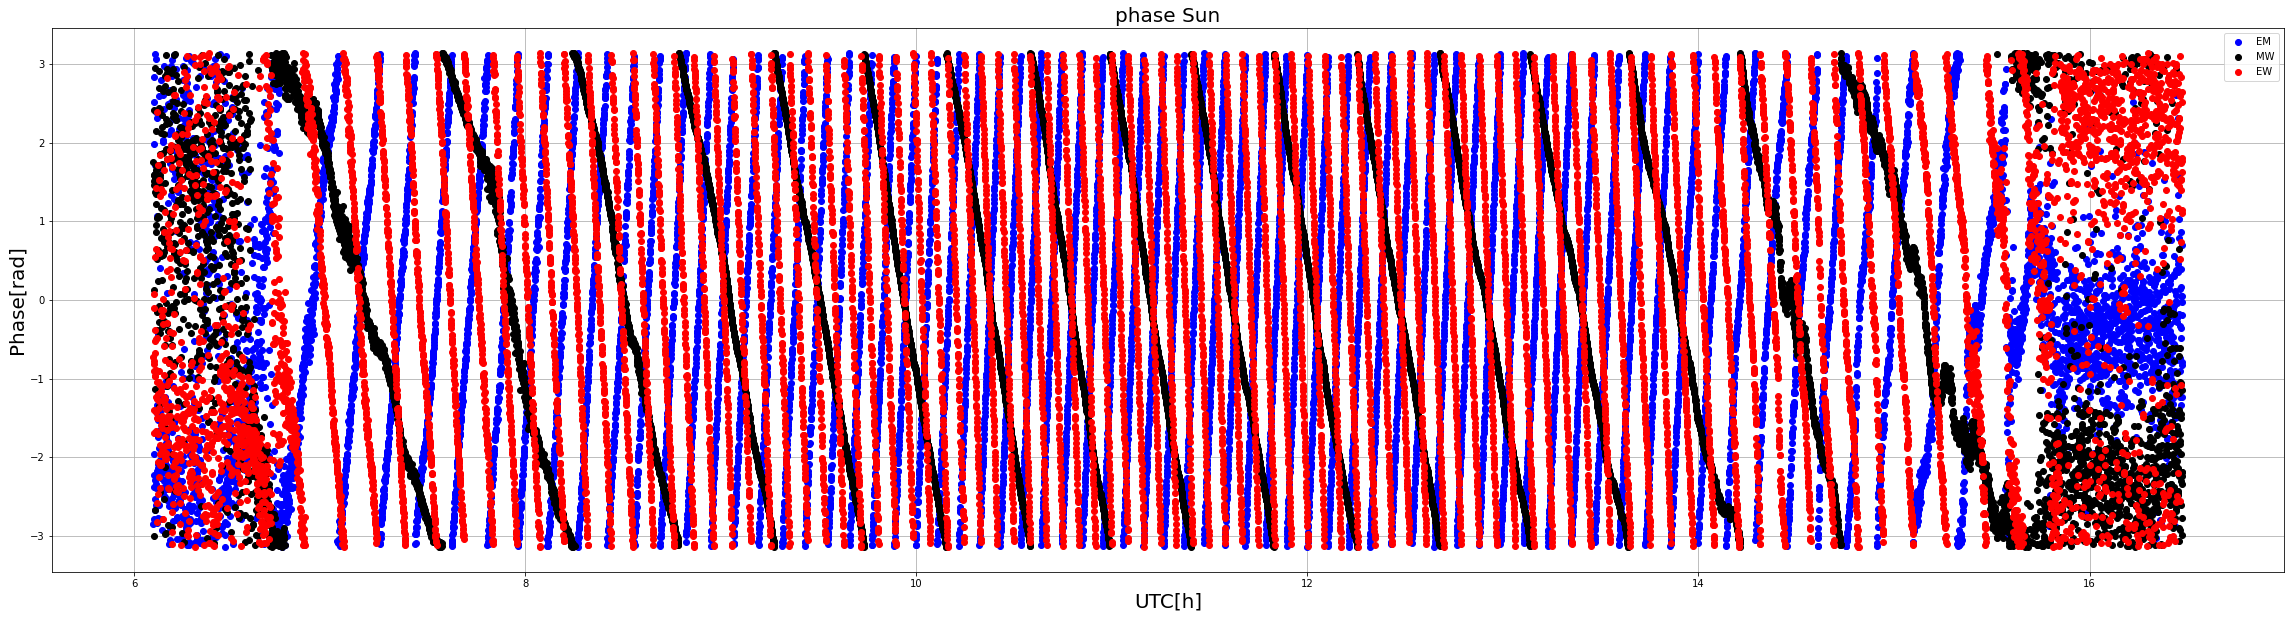

In [8]:
# limit and plot visiblity amplitude and phase for sun above horizon
vis_sun_mw = visibility_calc.vis_sun_mw(visibility_mw, time_h_res, time_sun[1],time_sun[3])
vis_sun_em = visibility_calc.vis_sun_em(visibility_em, time_h_res, time_sun[1],time_sun[3])
vis_sun_ew = visibility_calc.vis_sun_ew(visibility_ew, time_h_res, time_sun[1],time_sun[3])
plot_vis_sun = visibility_calc.plot_vis_sun(vis_sun_em,vis_sun_mw,vis_sun_ew,time_sun[0],scan_number)

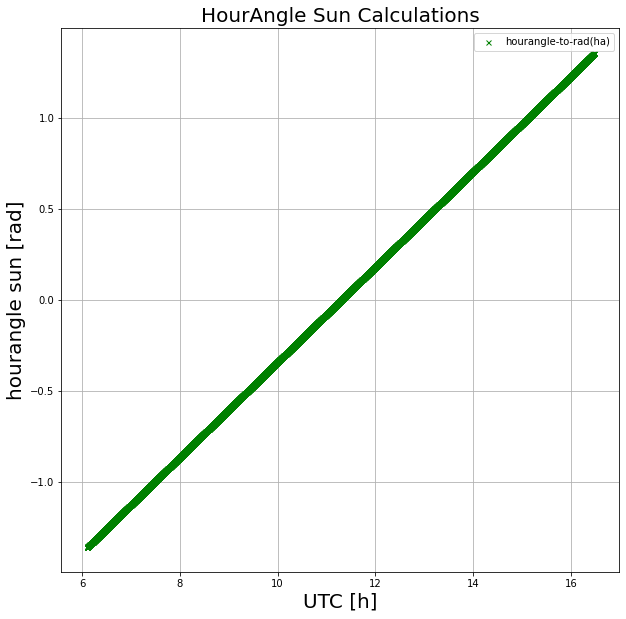

In [9]:
# calculate hour angle and declination of sun for observation day
sun_pos = uv_cov.hour_angle(time_sun[0],scan_number)


Results of EM baseline:
maximum baseline [m]: 7.9
Hour Angle of intersection of baseline with northern hemisphere (S=0°, W=90°, N=180°, E=270°)[deg]: 0.0
declination of intersection of baseline with northern hemisphere[deg]: 0.0
Results of MW baseline:
maximum baseline [m]: 2.0
Hour Angle of intersection of baseline with northern hemisphere (S=0°, W=90°, N=180°, E=270°)[deg]: 0.0
declination of intersection of baseline with northern hemisphere[deg]: 0.0
Results of EW baseline:
maximum baseline [m]: 9.9
Hour Angle of intersection of baseline with northern hemisphere (S=0°, W=90°, N=180°, E=270°)[deg]: 0.0
declination of intersection of baseline with northern hemisphere[deg]: 0.0
Results of EM baseline:
min scale from uv coverage: 1.5322648842218856 deg
time of min scale: 11.294166597388887
max scale from uv coverage: 5.493905772313833 deg
time of max scale: 16.47536764316667
Results of MW baseline:
min scale from uv coverage: 6.052446292676448 deg
time of min scale: 11.294166597388887
m

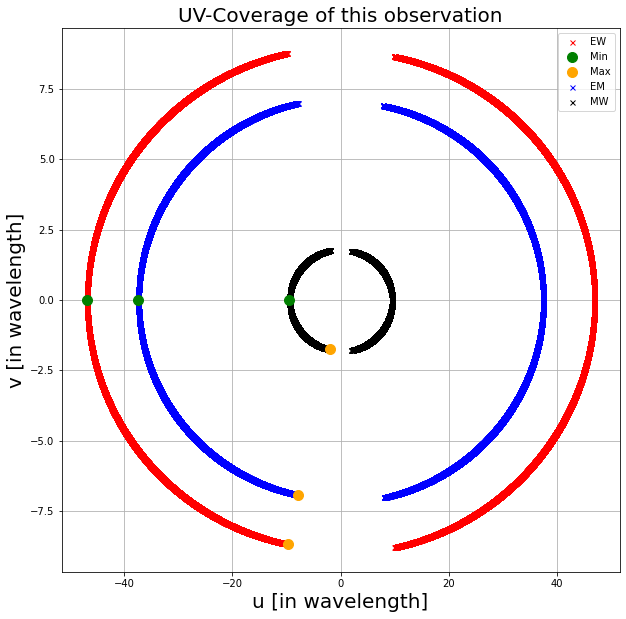

In [10]:
# According to baseline vector, calculate baseline length and hour angle/declination offsets
# B_x is in EW direction (m)
# B_y is in NS direction (m)
# B_z is Height difference (m)
D_em = uv_cov.baseline_length('EM',scan_number,B_x=7.9,B_y=0,B_z=0)
D_mw = uv_cov.baseline_length('MW',scan_number,B_x=2,B_y=0,B_z=0)
D_ew = uv_cov.baseline_length('EW',scan_number,B_x=9.9,B_y=0.0,B_z=0.0)
# calculate and plot u,v and w coordinates in units of wavelength, identify min and max scale
uvw_em = uv_cov.uvw(time_sun[0],scan_number,'EM',wavel,sun_pos[0],sun_pos[1],alpha=D_em[1], d=D_em[2],D=D_em[0])
uvw_mw = uv_cov.uvw(time_sun[0],scan_number,'MW',wavel,sun_pos[0],sun_pos[1],alpha=D_mw[1], d=D_mw[2],D=D_mw[0])
uvw_ew = uv_cov.uvw(time_sun[0],scan_number,'EW',wavel,sun_pos[0],sun_pos[1],alpha=D_ew[1], d=D_ew[2],D=D_ew[0])
plot_uvw = uv_cov.plot_uvw(uvw_em,uvw_mw,uvw_ew,scan_number)

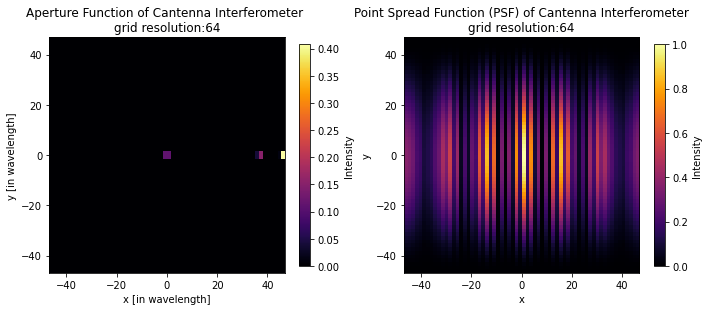

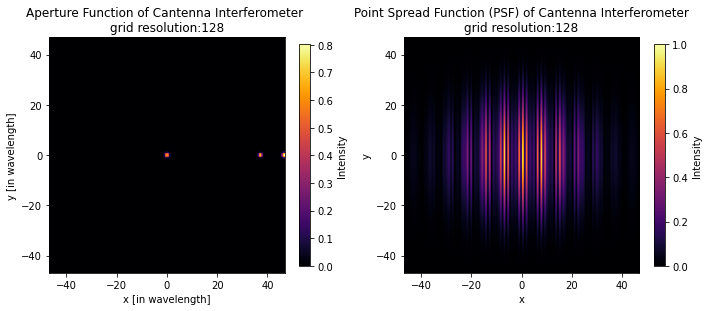

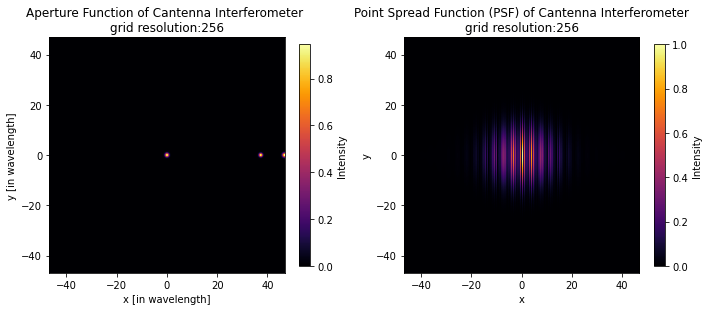

In [11]:
# one uvw and visibility list
uvw_vis = imaging.one_uv_vis_list(uvw_em,uvw_mw,uvw_ew,vis_sun_mw,vis_sun_em,vis_sun_ew)

import numpy as np
baselines_x = np.array([0, 7.9, 9.9])  # Baseline x component (m)
baselines_y = np.array([0,0,0]) # Baseline y component (m)

# dirty beam calculations (aperture function and PSF) for different resolutions (grid sizes)
dirty_beam0 = imaging.dirt_beam(scan_number,wavel[0], baselines_x, baselines_y, HPBW,grid_size=64)
dirty_beam1 = imaging.dirt_beam(scan_number,wavel[0], baselines_x, baselines_y, HPBW,grid_size=128)
dirty_beam2 = imaging.dirt_beam(scan_number,wavel[0], baselines_x, baselines_y, HPBW,grid_size=256)




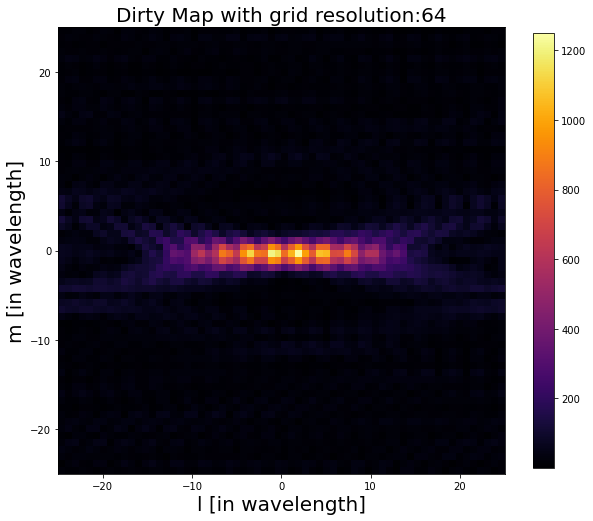

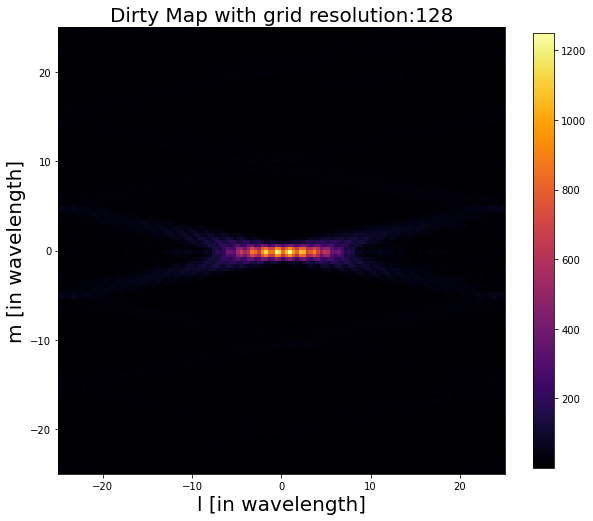

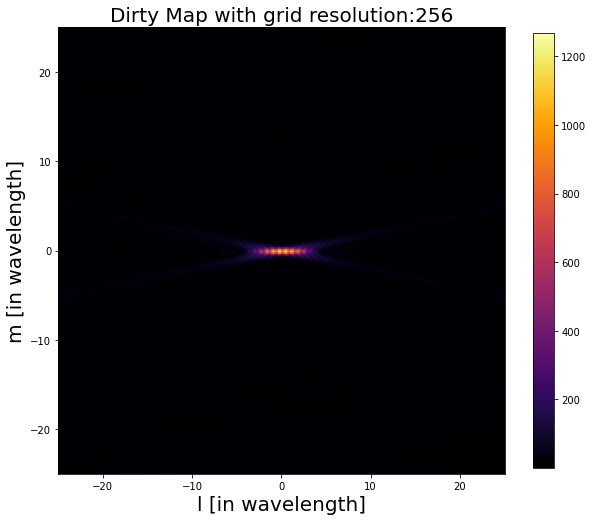

In [12]:
# dirty map calculations for different resolutions (grid sizes)
dirty_map0 = imaging.grid_ifft(scan_number,uvw_vis[3], uvw_vis[0],uvw_vis[1],grid_size=64)
dirty_map1 = imaging.grid_ifft(scan_number,uvw_vis[3], uvw_vis[0],uvw_vis[1],grid_size=128)
dirty_map2 = imaging.grid_ifft(scan_number,uvw_vis[3], uvw_vis[0],uvw_vis[1],grid_size=256)

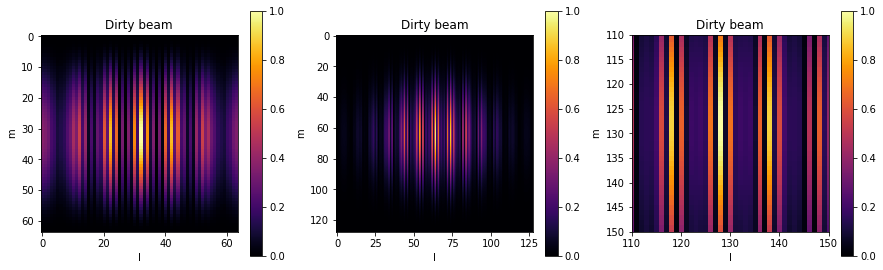

In [13]:
# plot different resolutions dirty beam

import matplotlib.pyplot as plt
import numpy as np

plt.figure(figsize=(15, 15))
ax1=plt.subplot(131)
plt.title("Dirty beam")
img1=ax1.imshow((np.abs(dirty_beam0)),cmap="inferno")
plt.xlabel("l")
plt.ylabel("m")
plt.colorbar(img1, shrink=0.3)
ax2=plt.subplot(132)
plt.title("Dirty beam")
img2=ax2.imshow((np.abs(dirty_beam1)),cmap="inferno")
plt.xlabel("l")
plt.ylabel("m")
plt.colorbar(img2, shrink=0.3)
ax3=plt.subplot(133)
plt.title("Dirty beam")
img3=ax3.imshow(((np.abs(dirty_beam2))),cmap="inferno")
plt.xlabel("l")
plt.ylabel("m")
plt.xlim(110,150)
plt.ylim(150,110)
plt.colorbar(img3, shrink=0.3)
plt.savefig('./Analysis/LCORR_'+str(scan_number)+'/dirty_beam.png',dpi=200,bbox_inches='tight')

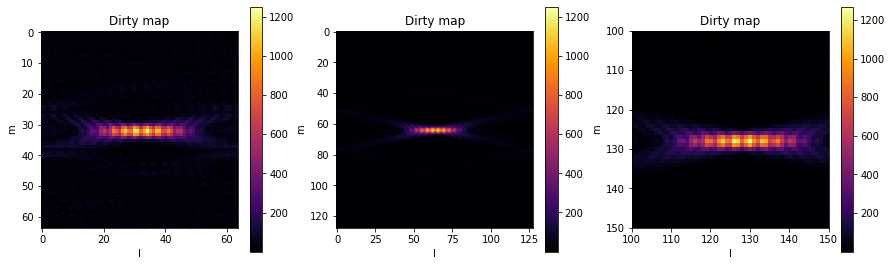

In [14]:
# plot different resolutions dirty map

import matplotlib.pyplot as plt
import numpy as np


plt.figure(figsize=(15, 15))

ax1=plt.subplot(131)
plt.title("Dirty map")
img1=ax1.imshow((np.abs(dirty_map0)),cmap="inferno")
plt.xlabel("l")
plt.ylabel("m")
plt.colorbar(img1,shrink=0.3)
ax2=plt.subplot(132)
plt.title("Dirty map")
img2=ax2.imshow((np.abs(dirty_map1)),cmap="inferno")
plt.xlabel("l")
plt.ylabel("m")
plt.colorbar(img2, shrink=0.3)
ax3=plt.subplot(133)
plt.title("Dirty map")
img3=ax3.imshow(((np.abs(dirty_map2))),cmap="inferno")
plt.xlabel("l")
plt.ylabel("m")
plt.xlim(100,150)
plt.ylim(150,100)
plt.colorbar(img3, shrink=0.3)
plt.savefig('./Analysis/LCORR_'+str(scan_number)+'/dirty_map.png',dpi=200,bbox_inches='tight')

Iteration: 23
Peak Value: 0.0


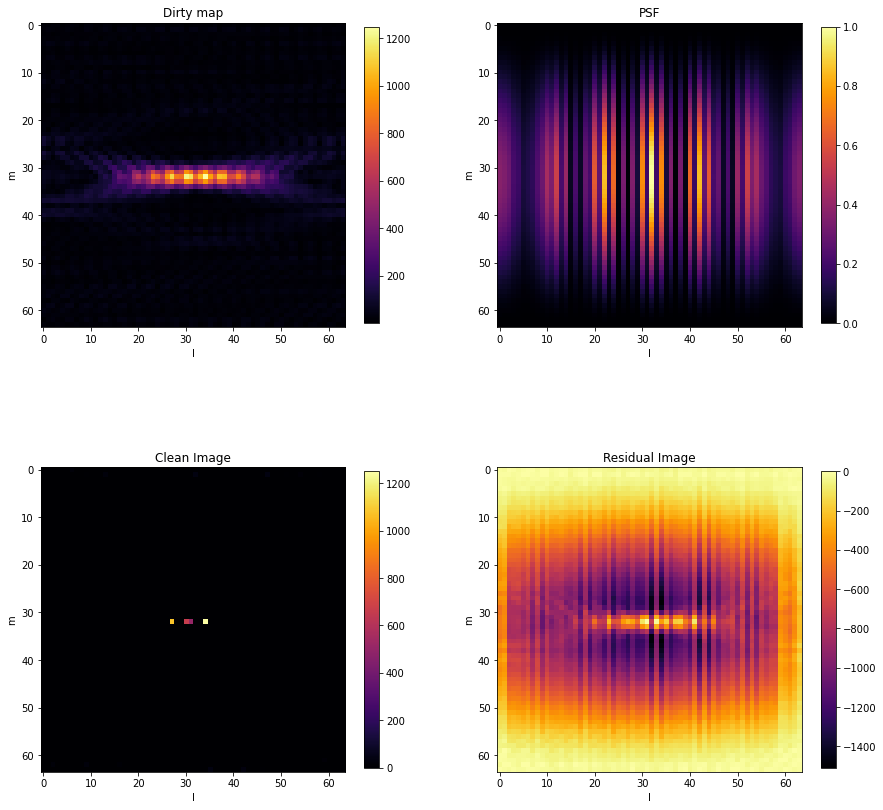

In [15]:
# Parameters
threshold = 0.01 # Threshold for CLEAN
max_iter = 500 # Maximum iterations
gain=1.0
# Perform CLEAN
clean_image,residual = imaging.clean(np.abs(dirty_map0), np.abs(dirty_beam0), threshold, max_iter,gain)


plt.figure(figsize=(15, 15))
plt.subplot(221)
plt.title("Dirty map")
plt.imshow((np.abs(dirty_map0)),cmap="inferno")
plt.xlabel("l")
plt.ylabel("m")
plt.colorbar(shrink=0.8)
plt.subplot(222)
plt.title("PSF")
plt.imshow((np.abs(dirty_beam0)),cmap="inferno")
plt.xlabel("l")
plt.ylabel("m")
plt.colorbar(shrink=0.8)
plt.subplot(223)
plt.title("Clean Image")
plt.imshow((((clean_image))),cmap="inferno")
plt.xlabel("l")
plt.ylabel("m")
plt.colorbar(shrink=0.8)
plt.subplot(224)
plt.title("Residual Image")
plt.imshow((((residual))),cmap="inferno")
plt.xlabel("l")
plt.ylabel("m")
plt.colorbar(shrink=0.8)
plt.savefig('./Analysis/LCORR_'+str(scan_number)+'/clean_process.png',dpi=200,bbox_inches='tight')

Results of fringe period fit EM baseline:
residuals: 4.175863928129978
Parameter 1/a: (20.353686494583936, 0.7116313894306542)
Parameter 2/b: (0.5568328113690494, 0.0018942529181592285)
Parameter 3/c: (2.3487179668343874, 0.08622825620335615)
Results of fringe period fit MW baseline:
residuals: 1358.124756015342
Parameter 1/a: (91.40408192564198, 80.91162644056121)
Parameter 2/b: (0.5531338401721342, 0.05087192702310273)
Parameter 3/c: (4.041929807260308, 3.749893939906086)
Results of fringe period fit EW baseline:
residuals: 19.579121271183194
Parameter 1/a: (14.291049696800446, 0.9298095880605413)
Parameter 2/b: (0.5659705477664533, 0.003413739150707887)
Parameter 3/c: (2.020130802132757, 0.12952983801512008)


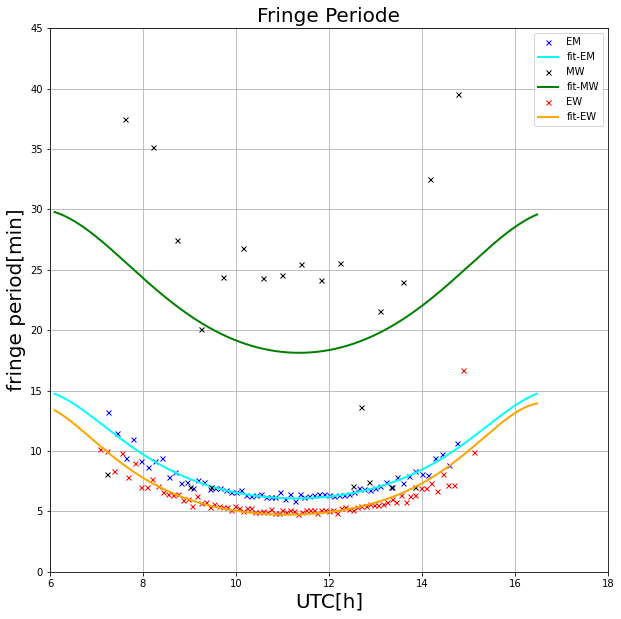

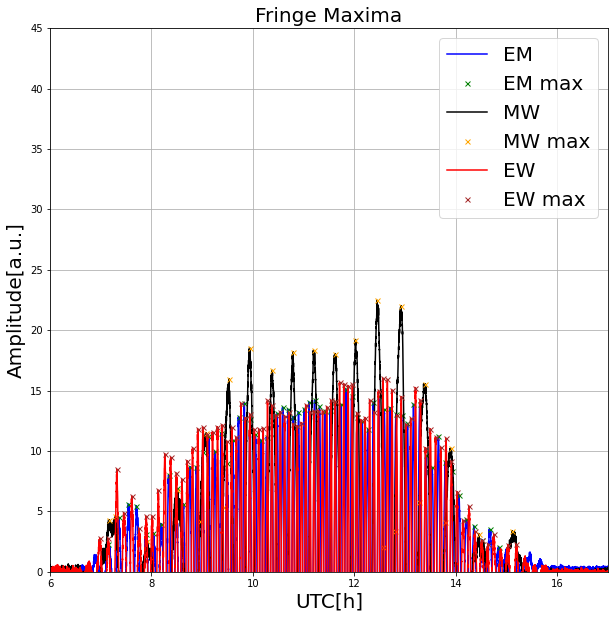

In [16]:
# from real part of correlation get fringe period --> indicator of projected baseline
# depending on baseline length, Bandwidth/Integration time: distance parameter in find_peaks must be changed
fringe_period_fit = fringe_period.fringe_period(correlation_em,correlation_mw,correlation_ew,scan_number,time_h_res,time_sun[0])

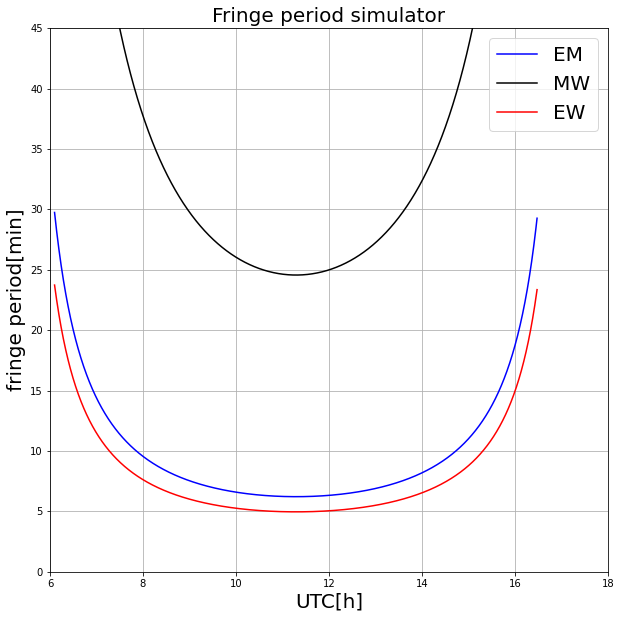

In [17]:
# fringe period simulator according tobaseline (u-coord) and declination of sun for each baseline

fringe_em = fringe_period.fringe_period_simulator(uvw_em[3], sun_pos[1])
fringe_ew = fringe_period.fringe_period_simulator(uvw_ew[3], sun_pos[1])
fringe_mw = fringe_period.fringe_period_simulator(uvw_mw[3], sun_pos[1])
#print(uvw_em[3])#,fringe_em)
plot_fringe_sim = fringe_period.plot_sim(fringe_em,fringe_ew,fringe_mw,time_sun[0], scan_number)

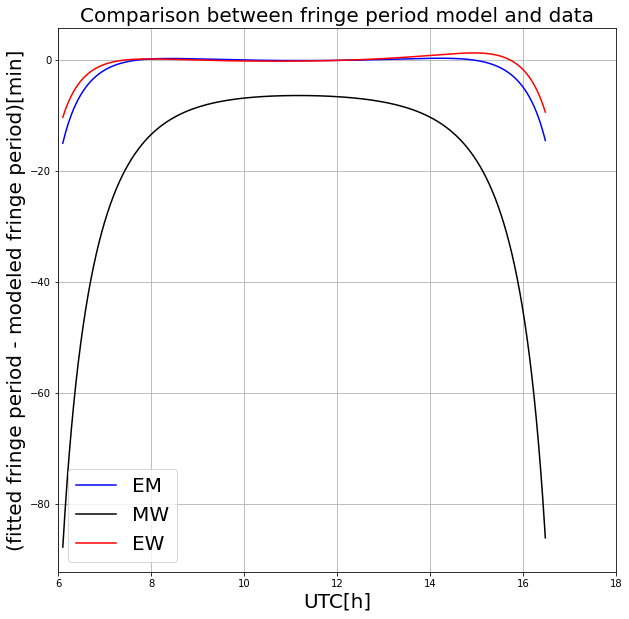

In [18]:
# compared the fitted and modeled results for the fringe period of each baseline
comp_fringe_period =  fringe_period.diff_fit_model(fringe_period_fit, fringe_em, fringe_ew, fringe_mw,time_sun[0], scan_number)

In [19]:
# define end time
end_time = time.time()
# define elapsed time
elapsed_time = end_time - start_time
# Executon time of this program
print(f'Execution time: {elapsed_time:.2f} seconds')

Execution time: 89.00 seconds
